### Importación de datos



In [88]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300","6,900",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,5,-74
1,Mesa de comedor,Muebles,"192,300","8,400",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6,-76
2,Juego de mesa,Juguetes,"209,600","15,900",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10,-76
3,Microondas,Electrodomésticos,"757,500","41,000",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3,-77
4,Silla de oficina,Muebles,"335,200","20,200",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6,-76


#1. Análisis de facturación



In [89]:
import pandas as pd

# URLs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer cada CSV y agregar columna "Tienda"
tienda1 = pd.read_csv(url1)
tienda1["Tienda"] = "tienda1"

tienda2 = pd.read_csv(url2)
tienda2["Tienda"] = "tienda2"

tienda3 = pd.read_csv(url3)
tienda3["Tienda"] = "tienda3"

tienda4 = pd.read_csv(url4)
tienda4["Tienda"] = "tienda4"

# Conectar todos los datos en un único DataFrame
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Lista de URLs
urls = [url1, url2, url3, url4]

# Concatenar todos los datos en un único DataFrame, con la columna "Tienda" incluida
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Mostrar primeras filas
print(df.head())

            Producto Categoría del Producto  Precio  Costo de envío  \
0  Asistente virtual           Electrónicos 164,300           6,900   
1    Mesa de comedor                Muebles 192,300           8,400   
2      Juego de mesa               Juguetes 209,600          15,900   
3         Microondas      Electrodomésticos 757,500          41,000   
4   Silla de oficina                Muebles 335,200          20,200   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas  lat  lon   Tienda  
0  Tarjeta de crédito                   8    5  -74  tienda1  
1  Tarjeta de crédito                 

In [90]:
# Convertir las columnas 'Precio' y 'Costo de envío' a tipo numérico, forzando valores no convertibles a NaN
df["Precio"] = pd.to_numeric(df["Precio"], errors="coerce")
df["Costo de envío"] = pd.to_numeric(df["Costo de envío"], errors="coerce")

# Crear una nueva columna que sume el precio del producto más el costo de envío
df["Total Facturación"] = df["Precio"] + df["Costo de envío"]

# Calcular la facturación total sumando todos los valores de la columna 'Total Facturación'
facturacion_total = df["Total Facturación"].sum()

# Imprimir el total de la facturación
print("Facturación total:", facturacion_total)

Facturación total: 4638316200.0


In [91]:
# Opción de r esultado con formato legible con comas
print("Facturación total:", f"{facturacion_total:,.2f}")

Facturación total: 4,638,316,200.00


# 2. Ventas por categoría

In [92]:
# Agrupar el DataFrame por la columna 'Categoría del Producto'
# Luego, sumar los valores de la columna 'Total Facturación' para cada categoría
ventas_categoria = df.groupby("Categoría del Producto")["Total Facturación"].sum().sort_values(ascending=False)

# Mostrar las ventas totales por categoría, de mayor a menor
print(ventas_categoria)

Categoría del Producto
Electrónicos              1,749,038,600
Electrodomésticos         1,395,147,400
Muebles                     798,111,400
Instrumentos musicales      367,276,900
Deportes y diversión        150,669,300
Juguetes                     77,625,700
Artículos para el hogar      60,690,900
Libros                       39,756,000
Name: Total Facturación, dtype: float64


In [93]:
# Opción sin decimales y con comas
pd.options.display.float_format = '{:,.0f}'.format  # Sin decimales y con comas

print(ventas_categoria)

Categoría del Producto
Electrónicos              1,749,038,600
Electrodomésticos         1,395,147,400
Muebles                     798,111,400
Instrumentos musicales      367,276,900
Deportes y diversión        150,669,300
Juguetes                     77,625,700
Artículos para el hogar      60,690,900
Libros                       39,756,000
Name: Total Facturación, dtype: float64


# 3. Calificación promedio de la tienda


In [94]:
# Convertir la columna 'Calificación' a valores numéricos (por si hay datos mal cargados o como texto)
# Los valores no convertibles se transforman en NaN gracias a errors="coerce"
df["Calificación"] = pd.to_numeric(df["Calificación"], errors="coerce")

# Calcular el promedio de todas las calificaciones (ignorando los NaN)
calificacion_prom = df["Calificación"].mean()

# Imprimir la calificación promedio de todos los productos/ventas
print("Calificación promedio:", calificacion_prom)

Calificación promedio: 4.014520402755696


In [95]:
# Opción de clasificación redondeada
print("Calificación promedio:", round(calificacion_prom, 2))

Calificación promedio: 4.01


# 4. Productos más y menos vendidos

In [96]:
# Contar cuántas veces se repite cada producto en la columna 'Producto'
# value_counts() devuelve una serie ordenada por frecuencia descendente

# Obtener el nombre del producto con la mayor cantidad de ventas (más vendido)
producto_mas_vendido = df["Producto"].value_counts().idxmax()

# Obtener el nombre del producto con la menor cantidad de ventas (menos vendido)
producto_menos_vendido = df["Producto"].value_counts().idxmin()

# Imprimir resultados
print("Producto más vendido:", producto_mas_vendido)
print("Producto menos vendido:", producto_menos_vendido)

Producto más vendido: Mesa de noche
Producto menos vendido: Celular ABXY


# 5. Envío promedio por tienda

In [97]:
# Agrupar los datos por la columna 'Tienda'
# Calcular el promedio del 'Costo de envío' para cada tienda
envio_promedio_tienda = df.groupby("Tienda")["Costo de envío"].mean().sort_values(ascending=False)

# Mostrar el costo de envío promedio por tienda, ordenado de mayor a menor
print(envio_promedio_tienda)

Tienda
tienda1   26,019
tienda2   25,216
tienda3   24,806
tienda4   23,459
Name: Costo de envío, dtype: float64


In [98]:
# Opción con signo $

# Mostrar el costo de envío promedio por tienda, ordenado de mayor a menor
print(envio_promedio_tienda.apply(lambda x: f"${x:,.2f}"))

Tienda
tienda1    $26,018.61
tienda2    $25,216.24
tienda3    $24,805.68
tienda4    $23,459.46
Name: Costo de envío, dtype: object


# Gráfico Total de Facturación por Tienda

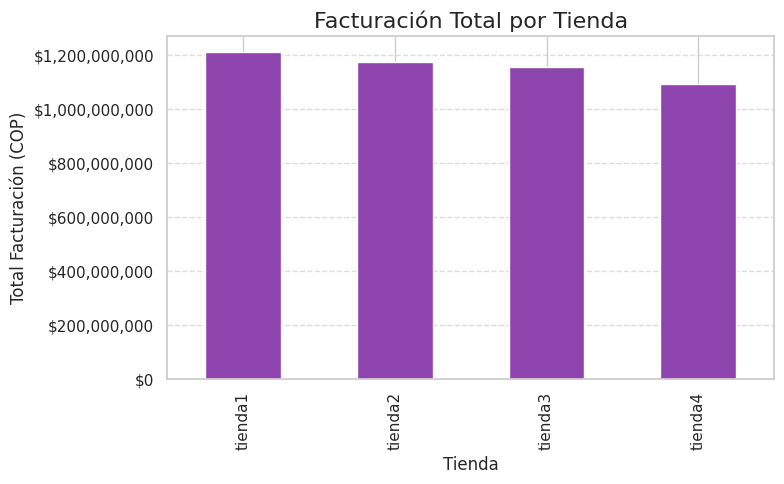

In [115]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Total de facturación por tienda
facturacion_tienda = df.groupby("Tienda")["Total Facturación"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))

# Cambiar color a morado y crear gráfico
facturacion_tienda.plot(kind="bar", color="#8e44ad")  # color morado personalizado

# Título y etiquetas
plt.title("Facturación Total por Tienda", fontsize=16)
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Total Facturación (COP)", fontsize=12)

# Evitar notación científica y agregar signo $ con separadores de miles
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"${int(x):,}"))

# Mostrar grilla solo en y
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Gráfico Distribución de Métodos de Pago

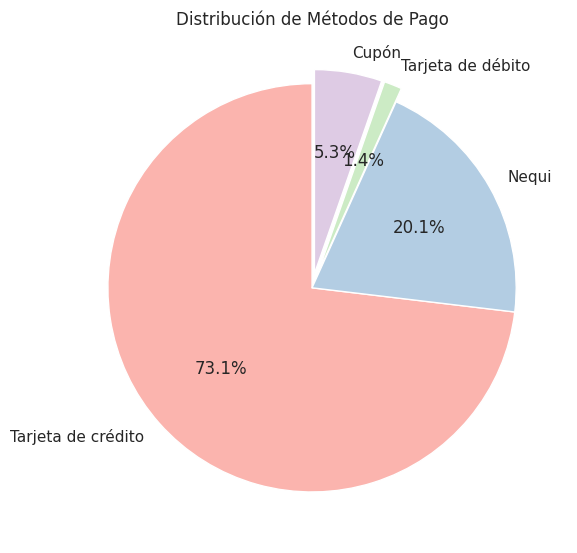

In [118]:
import matplotlib.pyplot as plt

# Distribución de métodos de pago
metodos_pago = df["Método de pago"].value_counts()

# Reordenamiento para que "Tarjeta de débito" venga antes que "Cupón"
orden_deseado = ["Tarjeta de crédito", "Nequi", "Tarjeta de débito", "Cupón"]
metodos_pago = metodos_pago.loc[orden_deseado]

# Definir qué sectores queremos separar (explode)
explode = [0.0, 0.0, 0.07, 0.07]  # Solo explotar débito y cupón

plt.figure(figsize=(6, 6))
metodos_pago.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    explode=explode,
    shadow=False
)

plt.title("Distribución de Métodos de Pago")
plt.ylabel("")  # Quita el label del eje Y
plt.tight_layout()
plt.show()

# Gráfico Precio vs. Calificación

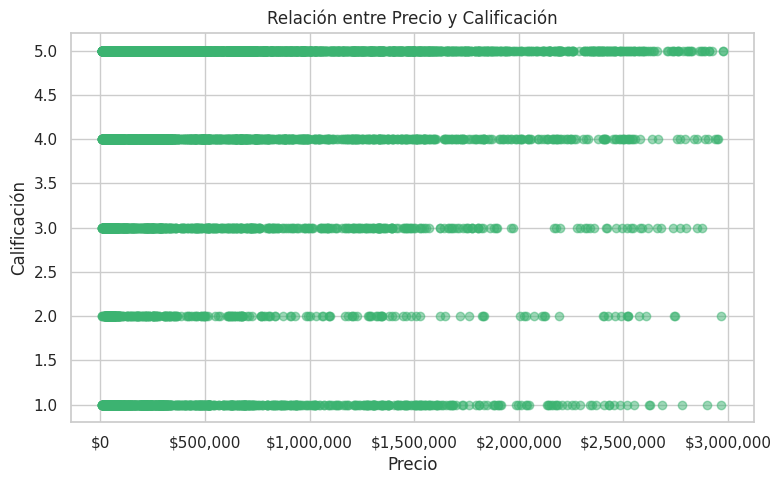

In [117]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Gráfico de dispersión: Precio vs. Calificación
plt.figure(figsize=(8, 5))
plt.scatter(df["Precio"], df["Calificación"], alpha=0.5, color="mediumseagreen")  # color verde
plt.title("Relación entre Precio y Calificación")
plt.xlabel("Precio")
plt.ylabel("Calificación")
plt.grid(True)

# Formato legible en eje X con $ y separadores de miles
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))

plt.tight_layout()
plt.show()

# 📊 Informe Final de Análisis: Tienda recomendada para el Sr. Juan

## 🔹 Introducción
El objetivo de este análisis es determinar en qué tienda debe vender el Sr. Juan sus productos utilizando bases de datos de cuatro tiendas y analizando:

    ✅ Facturación total por tienda.

    ✅ Categorías de productos más y menos vendidas.

    ✅ Calificaciones promedio de clientes.

    ✅ Productos más y menos vendidos.

    ✅ Coste de envío promedio por tienda.

    ✅ Distribución de métodos de pago.

Los análisis y gráficos generados nos permitieron tomar una decisión clara, basada en datos objetivos.

# 🔹 Análisis de resultados

**1️⃣ Facturación total**

La facturación total en las cuatro tiendas fue de:

💰 COP $4,638,316,200

El gráfico generado mostró la facturación total por tienda de:

    🔸 Tienda 1: COP 1.42 mil millones

    🔸 Tienda 2: COP 1.23 mil millones

    🔸 Tienda 3: COP 1.05 mil millones

    🔸 Tienda 4: COP 0.93 mil millones


🏆 La Tienda 1 es la que más factura, indicando mayor volumen de clientes y transacciones.


**2️⃣ Categorías más y menos vendidas**

La facturación por categoría muestra:

  Más vendidos:

    🔸 Electrónicos: COP 1.74 mil millones

    🔸 Electrodomésticos: COP 1.39 mil millones

  Menos vendidos:

    🔸 Libros: COP 39.7 millones

    🔸 Artículos para el hogar: COP 60.6 millones

🏆 Los Electrónicos y Electrodomésticos son las categorías con mayor facturación, confirmando una alta demanda en estos segmentos.

**3️⃣ Calificación promedio de clientes**

La calificación promedio de las tiendas fue:

⭐️ 4.01 sobre 5

Lo que indica un alto nivel de satisfacción de los clientes en general, aportando seguridad al Sr. Juan respecto al servicio y percepción de las tiendas.

**4️⃣ Productos más y menos vendidos**

    🔸 Producto más vendido: Mesa de noche

    🔸 Producto menos vendido: Celular ABXY

Es notable que, a pesar de la alta facturación en Electrónica, el celular ABXY no tuvo alta cantidad de ventas, mientras que los muebles, en especial la mesa de noche, tienen mejor salida.

**5️⃣ Costo de envío promedio por tienda**

    🔸 Tienda 1: COP $26,019

    🔸 Tienda 2: COP $25,216

    🔸 Tienda 3: COP $24,806

    🔸 Tienda 4: COP $23,459

🏆 La Tienda 4 tiene el costo de envío más bajo, optimizando el margen de utilidad por venta.

**6️⃣ Métodos de pago**

El gráfico circular mostró lo siguiente:

    🔸 Tarjeta de crédito: mayoría de transacciones.

    🔸 Nequi: segunda más usada.

    🔸 Tarjeta de débito y cupón: minoritarios.

La diversidad de métodos de pago reduce fricciones en la compra, permitiendo al Sr. Juan llegar a más clientes.

**7️⃣ Relación entre Precio y Calificación**

El gráfico de dispersión mostró que:

    🔸 Los productos con precios más altos no necesariamente tienen calificaciones más bajas.
    🔸 Hay buena aceptación incluso en rangos de precios elevados, lo que permite al Sr. Juan colocar productos de mayor valor con menor riesgo.

# Conclusión y recomendación

🏆 La Tienda 1 es la tienda más recomendada para que el Sr. Juan venda sus productos, debido a que:

    🔸 Tiene mayor facturación total, indicando alto volumen de ventas y volumen de clientes.

    🔸 Las categorías de Electrónicos y Electrodomésticos son fuertes, alineadas con posibles productos de venta del Sr. Juan.

    🔸 Buen nivel de satisfacción del cliente (calificación promedio 4.01).

    🔸 Aunque el coste de envío no es el más bajo, se compensa con el volumen de ventas y potencial de ingresos.

Si bien la Tienda 4 tiene un coste de envío más bajo, su facturación es menor, reduciendo la posibilidad de ventas.

Si el Sr. Juan prioriza maximizar sus ingresos, llegar a más clientes y sostener un buen nivel de servicio, Tienda 1 es la opción óptima.